<a href="https://colab.research.google.com/github/Quincy17/Machine-Learning/blob/main/Portfolio_CNN_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the libraries

In [ ]:
# Libraries CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- TensorFlow adalah salah satu framework machine learning paling populer yang dikembangkan oleh Google. Ini membantu dalam membuat, melatih, dan menjalankan model machine learning, terutama jaringan saraf dalam (deep learning).

- Keras adalah antarmuka tingkat tinggi (API) yang memungkinkan Anda membangun dan melatih model machine learning dengan lebih sederhana dan lebih intuitif. Keras sebenarnya dapat berjalan di atas TensorFlow, yang berarti ketika kita menggunakan Keras, TensorFlow yang mengerjakan "pekerjaan berat" di latar belakang.

- **tf** adalah singkatan untuk TensorFlow. Dengan mengimpor TensorFlow, kita dapat menggunakan semua fungsi dan kelas yang ada di dalam TensorFlow.

- ImageDataGenerator adalah kelas dari Keras yang digunakan untuk melakukan augmentasi gambar. Augmentasi gambar berarti kita membuat variasi baru dari gambar asli, seperti memutar, memperbesar, atau membalik gambar, yang berguna untuk melatih model machine learning dengan lebih banyak data tanpa benar-benar mengumpulkan gambar tambahan.

In [ ]:
tf.__version__

# Version tensorflow

'2.19.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
# Preprocessing data train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Pastikan path ke folder training_set di Drive benar
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Bootcamp AIML Dibimbing/Portfolio/dataset/train_set',  # ganti sesuai struktur Drive
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 38 images belonging to 2 classes.


1. ImageDataGenerator: Kode ini menggunakan ImageDataGenerator untuk membuat berbagai modifikasi pada gambar, yang sering disebut augmentasi gambar (image augmentation). Augmentasi membantu meningkatkan variasi data gambar selama pelatihan model, membuat model lebih robust dan tidak overfit pada dataset.

Berikut penjelasan parameter-parameter yang digunakan:

   - rescale = 1./255: Gambar biasanya disimpan dengan nilai piksel antara 0 hingga 255. Untuk deep learning, lebih umum bekerja dengan nilai antara 0 hingga 1, sehingga kita membagi semua nilai piksel dengan 255.

   - shear_range = 0.2: Ini digunakan untuk menerapkan pergeseran (shearing) pada gambar hingga 20%. Shearing adalah proses memiringkan gambar di sepanjang sumbu tertentu, sehingga memberikan variasi sudut pada gambar.

  - zoom_range = 0.2: Ini digunakan untuk menerapkan zoom pada gambar hingga 20%. Artinya, gambar bisa diperbesar atau diperkecil sedikit secara acak, yang memberikan model lebih banyak variasi dalam pelatihan.

   - horizontal_flip = True: Ini memungkinkan gambar dibalik secara horizontal. Contoh: jika Anda memiliki gambar seekor anjing menghadap ke kiri, setelah flip horizontal, anjing itu akan menghadap ke kanan.

2. flow_from_directory: Fungsi ini digunakan untuk memuat gambar dari sebuah folder/direktori secara batch, dan melakukan augmentasi sesuai yang didefinisikan di atas. Ini sangat berguna untuk melatih model dengan gambar dari direktori tertentu.

Penjelasan parameternya:

   - 'dataset/training_set': Ini adalah jalur menuju folder yang berisi data pelatihan (training data). Gambar di dalam folder ini akan digunakan untuk melatih model. Biasanya, folder ini dibagi lagi ke dalam sub-folder berdasarkan label (kelas) gambar.

   - target_size = (64, 64): Semua gambar akan diubah ukurannya menjadi 64x64 piksel. Ini diperlukan karena jaringan saraf (neural networks) biasanya memerlukan input dengan ukuran tetap.

   - batch_size = 32: Data akan diambil dalam kelompok (batch) berukuran 32 gambar setiap kali iterasi. Melatih model dengan batch membantu dalam mempercepat proses pelatihan, sekaligus mengurangi beban memori.

   - class_mode = 'binary': Ini menunjukkan bahwa masalah yang sedang dipecahkan adalah klasifikasi biner (binary classification), yaitu gambar akan diklasifikasikan ke dalam dua kelas (misalnya: gambar anjing atau gambar kucing). Jika ada lebih dari dua kelas, Anda bisa menggunakan 'categorical'.

### Preprocessing the Test set

In [ ]:
# Preprocessing data test
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Bootcamp AIML Dibimbing/Portfolio/dataset/train_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 38 images belonging to 2 classes.


1. ImageDataGenerator (untuk data pengujian): Di sini, kita membuat sebuah objek ImageDataGenerator untuk data pengujian, tetapi hanya menggunakan parameter rescale tanpa augmentasi lain seperti pada data pelatihan.

  -  rescale = 1./255: Sama seperti pada data pelatihan, kita juga perlu membagi nilai piksel dengan 255 agar setiap nilai berada dalam rentang 0 hingga 1. Ini adalah langkah penting karena model deep learning lebih mudah bekerja dengan nilai yang lebih kecil (antara 0 dan 1) daripada nilai asli gambar yang berkisar dari 0 hingga 255.

Tidak ada augmentasi gambar yang diterapkan di sini karena data pengujian tidak perlu diubah-ubah. Data pengujian sebaiknya tetap apa adanya untuk menguji seberapa baik model Anda bekerja dengan data "asli" yang tidak diubah.

2. flow_from_directory (untuk data pengujian): Kode ini mirip dengan yang digunakan pada set pelatihan, tetapi untuk data pengujian. Data pengujian digunakan untuk mengevaluasi model setelah dilatih. Penjelasan parameternya adalah:

   - 'dataset/test_set': Ini adalah jalur menuju folder yang berisi data pengujian. Sama seperti data pelatihan, di sini gambar juga disusun dalam sub-folder berdasarkan kelasnya (misalnya, 'dogs' dan 'cats' jika Anda mengklasifikasikan anjing dan kucing).

   - target_size = (64, 64): Sama seperti data pelatihan, gambar pengujian juga diubah ukurannya menjadi 64x64 piksel agar sesuai dengan input yang diharapkan oleh model.

   - batch_size = 32: Sama seperti pada data pelatihan, gambar akan diproses dalam batch yang terdiri dari 32 gambar pada satu waktu.

   - class_mode = 'binary': Sama seperti pada data pelatihan, ini menunjukkan bahwa kita sedang mengerjakan masalah klasifikasi biner (binary classification), di mana ada dua kelas (misalnya, anjing atau kucing).

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
# Call CNN Algorithm
cnn = tf.keras.models.Sequential()

1. CNN (Convolutional Neural Network): CNN adalah tipe jaringan saraf buatan (neural network) yang sangat populer untuk tugas-tugas terkait gambar, seperti klasifikasi gambar, deteksi objek, atau segmentasi gambar. CNN dirancang untuk bekerja dengan baik pada data yang memiliki struktur grid seperti gambar, di mana setiap gambar bisa dianggap sebagai grid dari piksel.

2. Sequential Model: Kode ini menggunakan Sequential API dari Keras untuk membuat model CNN. Sequential() adalah jenis model yang paling sederhana di Keras, di mana kita dapat menambahkan layer (lapisan) secara berurutan satu per satu. Dengan kata lain, model ini mengikuti urutan lapisan dari input hingga output. Jadi, setiap lapisan memiliki satu input dan satu output, yang diproses berurutan.

### Step 1 - Convolution

In [ ]:
# Convolution Process
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Convolutional Layers (lapisan konvolusi): Untuk mendeteksi fitur dari gambar, seperti tepi atau pola.

### Step 2 - Pooling

In [ ]:
# Pooling Process
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

- Lapisan pooling ini mengurangi ukuran fitur peta (feature map) dengan mengambil nilai maksimum dalam setiap blok 2x2 piksel, mengurangi dimensi data dan komputasi.
- Strides=2 berarti melangkah 2 piksel sekaligus, mempercepat proses sambil menjaga fitur penting.

### Adding a second convolutional layer

In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

- Lapisan konvolusi ini menerapkan 32 filter (atau detektor fitur) berukuran 3x3 untuk mengekstrak fitur dari gambar, seperti tepi atau pola.
- Fungsi aktivasi ReLU memperkenalkan non-linearitas, membantu model belajar pola yang lebih kompleks.

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

- Pooling lapisan kedua ini kembali mengurangi ukuran peta fitur dengan prinsip yang sama, menjaga informasi penting dan mengurangi komputasi.
- Ini juga membantu mengurangi kemungkinan overfitting dengan mereduksi detail yang tidak penting.

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

- Lapisan Flatten mengubah data dari bentuk 2D (matrix) menjadi vektor 1D untuk persiapan masuk ke lapisan fully connected.
- Ini memungkinkan informasi dari peta fitur diproses oleh lapisan dense untuk klasifikasi.

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

- Lapisan output ini hanya memiliki 1 neuron karena masalah klasifikasi biner, menentukan apakah gambar milik satu kelas atau lainnya.
- Aktivasi Sigmoid menghasilkan output antara 0 dan 1, ideal untuk klasifikasi biner (misalnya, kucing vs anjing).

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

- Fungsi compile mengatur cara CNN akan dilatih. Optimizer Adam digunakan untuk memperbarui bobot jaringan secara efisien, dan binary_crossentropy sebagai fungsi kerugian yang cocok untuk klasifikasi biner.
- Metrics = ['accuracy'] meminta model untuk melacak akurasi selama pelatihan, yang menunjukkan seberapa baik model mengklasifikasikan gambar dengan benar.

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4545 - loss: 0.7356 - val_accuracy: 0.6053 - val_loss: 0.6704
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4444 - loss: 0.6851 - val_accuracy: 0.5000 - val_loss: 0.6837
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4795 - loss: 0.7087 - val_accuracy: 0.5263 - val_loss: 0.6612
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step - accuracy: 0.4444 - loss: 0.6850 - val_accuracy: 0.5000 - val_loss: 0.6541
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5351 - loss: 0.6632 - val_accuracy: 0.6053 - val_loss: 0.6406
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7105 - loss: 0.6679 - val_accuracy: 0.9211 - val_loss: 0.6251
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - accuracy: 0.7237 - loss: 0.6475 - val_accuracy: 0.7105 - val_loss: 0.6021
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.8531 - loss: 0.6315 - val_accuracy: 0.5263 - val_loss: 0.6124
Epoch 9

- Fungsi fit melatih model menggunakan data pelatihan (training_set) selama 20 epoch (putaran pelatihan).
- validation_data = test_set memungkinkan evaluasi model pada data pengujian di setiap epoch untuk memonitor kinerja pada data yang belum pernah dilihat.

# Part 4 Evaluation Model

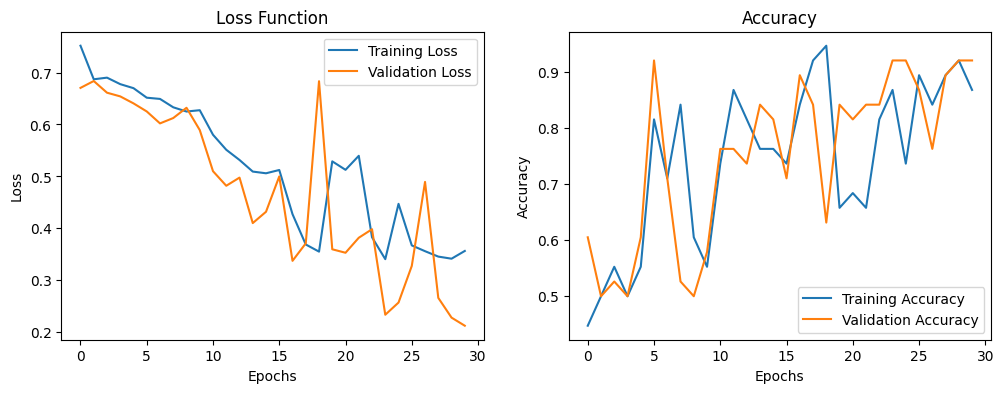

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan grafik Loss dan Akurasi
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


- Grafik Loss dan Akurasi: Karena history sudah disimpan dalam variabel history, Anda langsung bisa mengakses history.history['loss'] dan history.history['accuracy'] untuk menampilkan grafik loss dan akurasi.

## Part 5 - Making a single & Multiple prediction (Inference)

In [ ]:
# Single Prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Bootcamp AIML Dibimbing/Portfolio/dataset/single_prediction/helm_or_not2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'helm'
else:
  prediction = 'tanpa helm'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [ ]:
print(prediction)

tanpa helm


In [ ]:
# Multiple Prediction
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os

# Fungsi untuk memuat dan memprediksi gambar
def load_and_predict_image(image_path, model, class_indices):
    try:
        test_image = image.load_img(image_path, target_size=(64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)

        # Prediksi gambar
        result = model.predict(test_image)

        # Mapping hasil prediksi ke nama kelas
        if result[0][0] == 1:
            prediction = 'helm'
        else:
            prediction = 'tanpa helm'

        return prediction, image.load_img(image_path, target_size=(64, 64))  # Return prediksi dan gambar asli
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None, None  # Jika ada error, kembalikan None

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


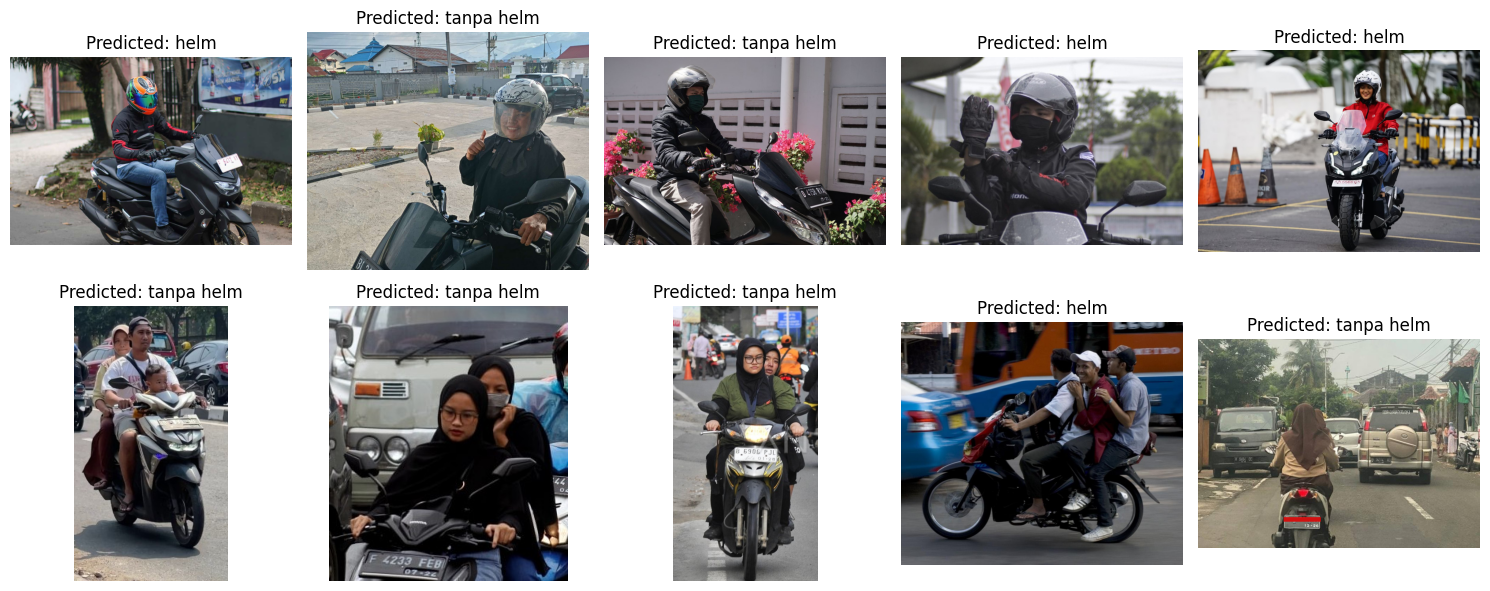

In [ ]:
  # Menyiapkan plot
from PIL import Image
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 baris, 5 kolom

# Mendapatkan jalur gambar dari folder test_set
image_dir = '/content/drive/MyDrive/Bootcamp AIML Dibimbing/Portfolio/dataset/test_set'
# image_dir = 'dataset/test_set'
image_paths = []

# Loop melalui direktori anjing dan kucing untuk mengambil gambar
for label in ['test-helm', 'test-nohelm']:
    label_dir = os.path.join(image_dir, label)
    image_files = os.listdir(label_dir)
    image_paths += [os.path.join(label_dir, img) for img in image_files[:5]]  # Ambil 5 gambar dari setiap kelas

# Melakukan prediksi untuk 10 gambar dan menampilkannya
for i, ax in enumerate(axes.flat):
    img_path = image_paths[i]
    prediction, img = load_and_predict_image(img_path, cnn, training_set.class_indices)

    if img is not None:  # Pastikan gambar berhasil dimuat
        # Tampilkan gambar dan prediksi
        ax.imshow(Image.open(img_path))
        ax.set_title(f'Predicted: {prediction}')
    else:
        ax.set_title('Error loading image')

    ax.axis('off')  # Hilangkan axis

plt.tight_layout()
plt.show()

  1.  Fungsi load_and_predict_image:
      -  Memuat gambar, mengubahnya ke array, dan membuat prediksi menggunakan model yang sudah dilatih (cnn).
      -  Mengembalikan prediksi dan gambar asli.

  2.  Pengaturan Subplot:
      -  plt.subplots(2, 5) membuat grid dengan 2 baris dan 5 kolom untuk menampilkan 10 gambar.
      -  axes.flat digunakan untuk melakukan iterasi pada semua subplot.

  3.  Memuat Gambar dari dataset/test_set:
      -  Mengambil 5 gambar dari folder 'cats' dan 5 gambar dari folder 'dogs'.
      -  Gambar-gambar ini digunakan untuk prediksi.

  4.  Prediksi dan Tampilan Gambar:
      -  Setelah memprediksi setiap gambar, hasil prediksi ditampilkan sebagai judul pada subplot.
      -  Gambar ditampilkan menggunakan ax.imshow() dan axis dihilangkan untuk tampilan yang lebih bersih.

Dengan kode ini, Anda bisa memprediksi dan menampilkan 10 gambar dari folder test_set dalam subplot dengan hasil prediksi masing-masing.